In [26]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

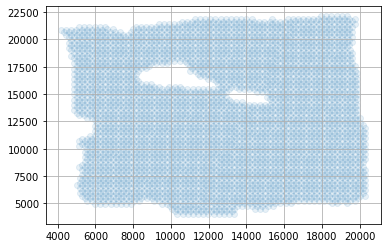

In [27]:
# data points(x,y coordinate) for the tissue
path1 = '/Users/seongwoohan/desktop/tissue_positions_list.csv'
position = pd.read_csv(path1)

tissue_spots = position.iloc[:,1] == 1
position = position.loc[tissue_spots,:]

re_position = position.reset_index(drop=True)
new_x = re_position.iloc[:,4] 
new_y = re_position.iloc[:,5] 
plt.scatter(x = new_y, y = new_x, alpha=0.1)
plt.grid()

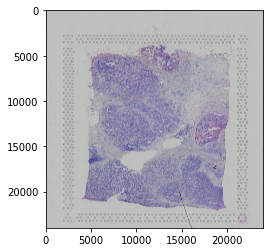

In [28]:
path = '/Users/seongwoohan/desktop/tissue_hires_image.png'
img = cv2.imread(path)

# rescale image
dsize = (24000,24000)
resized_img = cv2.resize(img, dsize, fx = 0.5, fy = 0.5)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img_rgb)
plt.show()

In [29]:
# check data type
print(resized_img_rgb.dtype)
print(resized_img_rgb.ndim)
print(resized_img_rgb.shape)

uint8
3
(24000, 24000, 3)


In [46]:
# check x, y label
new_x = re_position.iloc[:,4] 
new_y = re_position.iloc[:,5] 

print(new_x)
print()

# total length
a = len(new_x)
print('total length:', a)
print()

# first row
x_label = new_x[0]
y_label = new_y[0]
print('x_label:', x_label)
print('y_label:',y_label)

# top five rows
re_position.head()

0        4283
1        4046
2        4284
3        4047
4        4284
        ...  
3808    22115
3809    22115
3810    22116
3811    22116
3812    22117
Name: x_label, Length: 3813, dtype: int64

total length: 3813

x_label: 4283
y_label: 10213


,barcode,spot,num1,num2,x_label,y_label
0,CAGGATCCGCCCGACC-1,1,1,49,4283,10213
1,CACGATTGGTCGTTAA-1,1,0,50,4046,10350
2,GGTTGTATCGTGAAAT-1,1,1,51,4284,10486
3,TCTTATGGGTAGTACC-1,1,0,52,4047,10623
4,TACAAGCTGTTCACTG-1,1,1,53,4284,10759


x_label: 13309
y_label: 9377


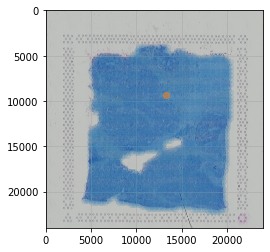

In [31]:
# show random spot 
random_num = np.random.randint(len(new_x))
   
x_label = new_x[random_num]
y_label = new_y[random_num]
print('x_label:', x_label)
print('y_label:',y_label)

plt.imshow(resized_img_rgb, zorder=1)
plt.scatter(new_y, new_x, alpha=0.1, zorder=2)
plt.scatter(x_label, y_label, alpha =0.5, zorder=3)
plt.grid()
plt.show()

In [47]:
# roi diameter and scale
spot_diameter_fullres = 177.4829519178534
tissue_hires_scalef = 0.08250825

x_label: 7860
y_label: 17442
radius: 88
square filenmae: TGACACTTCTCTTTGC-1-square.png
circle filename: TGACACTTCTCTTTGC-1-circle.png
cropped filename: TGACACTTCTCTTTGC-1-cropped.png


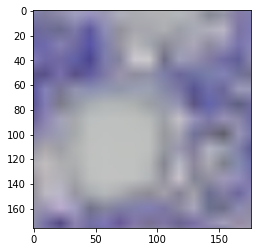

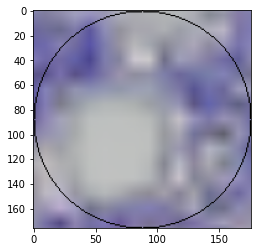

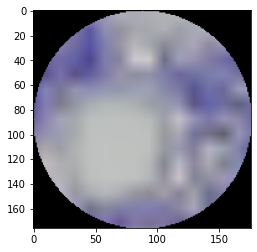

x_label: 7616
y_label: 13757
radius: 88
square filenmae: CCTCTGGCCTAGACGG-1-square.png
circle filename: CCTCTGGCCTAGACGG-1-circle.png
cropped filename: CCTCTGGCCTAGACGG-1-cropped.png


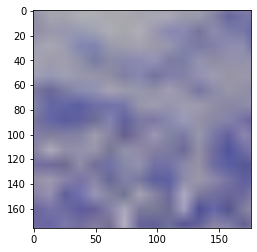

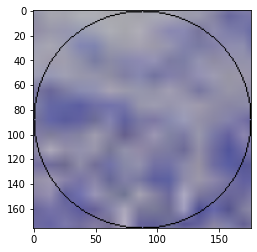

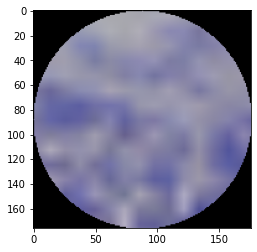

x_label: 19240
y_label: 5134
radius: 88
square filenmae: AAACTTAATTGCACGC-1-square.png
circle filename: AAACTTAATTGCACGC-1-circle.png
cropped filename: AAACTTAATTGCACGC-1-cropped.png


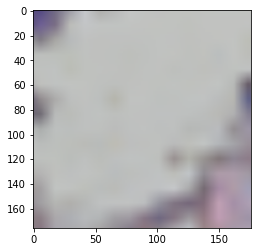

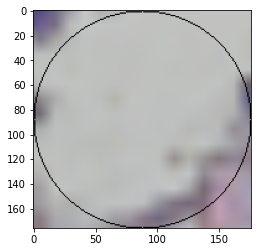

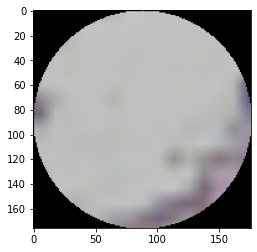

In [56]:
# image resolution should be low for this one

# total spots
a = len(new_x)

# run random 3 spot
for i in range(3):
    random_num = np.random.randint(len(new_x))
    x_label = new_x[random_num]
    y_label = new_y[random_num]
    
    # row
    print('x_label:', x_label)
    # column
    print('y_label:', y_label)
    # radius
    rad = int(spot_diameter_fullres/2)
    print('radius:',rad)
    
    # find barcode name
    a = re_position[(re_position['x_label']==x_label) & (re_position['y_label']==y_label)]['barcode']
    b = a.tolist()[0]
    
    # file directory
    path = '/Users/seongwoohan/desktop/ST_image/'
    square_file_name = b +'-square.png'
    circle_file_name = b + '-circle.png'
    cropped_file_name = b + '-cropped.png'
    print('square filenmae: % s' % (square_file_name))
    print('circle filename: % s' % (circle_file_name))
    print('cropped filename: % s' % (cropped_file_name))
    
    # square image
    roi_square = resized_img_rgb[y_label-rad:y_label+rad, x_label-rad:x_label+rad]
    cv2.imwrite(path + square_file_name, roi_square)
    plt.imshow(roi_square)
    plt.show()
    
    resized_circle_img = cv2.circle(resized_img_rgb, center = (x_label, y_label), radius = rad, 
           color = (0,0,0), thickness = 1)
    mask = np.zeros_like(resized_circle_img)
    rows, cols,_ = mask.shape

    mask = cv2.circle(mask, center = (x_label, y_label), radius = rad, 
               color = (255,255,255), thickness = -1)
               
    result = np.bitwise_and(resized_img, mask)
    
    # convert image into RGB
    #resized_circle_img_rgb = cv2.cvtColor(resized_circle_img, cv2.COLOR_BGR2RGB)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    # circle image
    roi_circle = resized_circle_img[y_label-rad:y_label+rad, x_label-rad:x_label+rad]
    cv2.imwrite(path + circle_file_name, roi_circle)
    plt.imshow(roi_circle)
    plt.show()

    # cropped image
    roi_cropped = result_rgb[y_label-rad:y_label+rad, x_label-rad:x_label+rad]
    cv2.imwrite(path + cropped_file_name, roi_cropped)    
    plt.imshow(roi_cropped)
    plt.show()
    

In [11]:
a = 5
for i in range(a):
    first_x = new_x[i]
    first_y = new_y[i]
    print(i)
    print(first_x)
    print(first_y)
    a=new_x[1946]
    b=new_y[1946]
    print(a)
    print(b)
    print()

0
4283
10213
13310
10197

1
4046
10350
13310
10197

2
4284
10486
13310
10197

3
4047
10623
13310
10197

4
4284
10759
13310
10197

